<a href="https://colab.research.google.com/github/ptrzky/Machine-Learning/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Putri Rezky Aemilya B. | H071201078 

#Import Librari

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#Membaca data

In [7]:
df = pd.read_csv("/content/drive/MyDrive/Machine Leaning/Praktisi/car_evaluation.csv")
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [9]:
df.shape

(1727, 7)

In [11]:
df.rename(columns={'low':'safety',"small":"lug_boot","2.1":"number of persons",
                   "2":"number of doors","vhigh":"buying price","vhigh.1":"maintenance cost"},inplace=True)
df.columns

Index(['buying price', 'maintenance cost', 'number of doors',
       'number of persons', 'lug_boot', 'safety', 'unacc'],
      dtype='object')

In [13]:
df.dtypes

buying price         object
maintenance cost     object
number of doors      object
number of persons    object
lug_boot             object
safety               object
unacc                object
dtype: object

#EDA

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   buying price       1727 non-null   object
 1   maintenance cost   1727 non-null   object
 2   number of doors    1727 non-null   object
 3   number of persons  1727 non-null   object
 4   lug_boot           1727 non-null   object
 5   safety             1727 non-null   object
 6   unacc              1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [15]:
df.describe().T.style.background_gradient(cmap='Greens')

,count,unique,top,freq
buying price,1727,4,high,432
maintenance cost,1727,4,high,432
number of doors,1727,4,3,432
number of persons,1727,3,4,576
lug_boot,1727,3,med,576
safety,1727,3,med,576
unacc,1727,4,unacc,1209


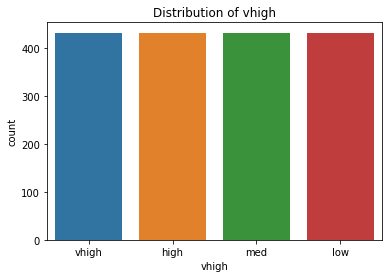

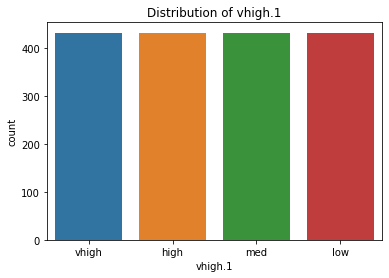

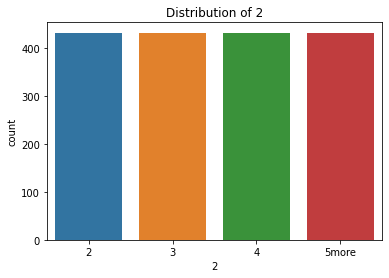

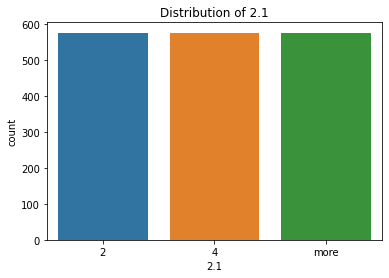

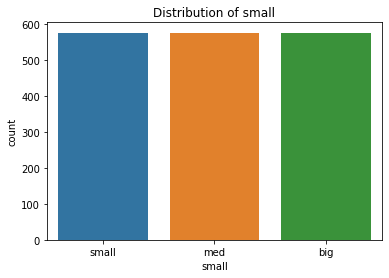

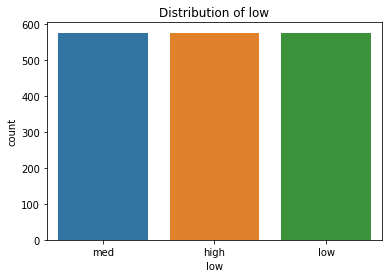

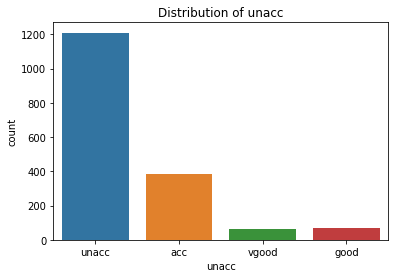

In [17]:
def plot_bar(d,i):
    #fig = plt.figure(figsize = (7, 6))
    plt.subplot(1,1,1)
    sns.countplot(d[i])
    plt.title(f"Distribution of {i}")
    plt.show()
for i in d.columns:
    plot_bar(d,i)

In [18]:
li = list(d.columns)
li

['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc']

#Label Ecoding

In [19]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in li:
    d[i] = labelencoder.fit_transform(d[i])

In [20]:
df.head()

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


#Splitting Data

In [21]:
x = d.iloc[:,:-1]
y = d.iloc[:,-1]

In [22]:
x.head()

,vhigh,vhigh.1,2,2.1,small,low
0,3,3,0,0,2,2
1,3,3,0,0,2,0
2,3,3,0,0,1,1
3,3,3,0,0,1,2
4,3,3,0,0,1,0


In [23]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: unacc, dtype: int64

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30 ,random_state =1)

#Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred1 = lr.predict(x_test)

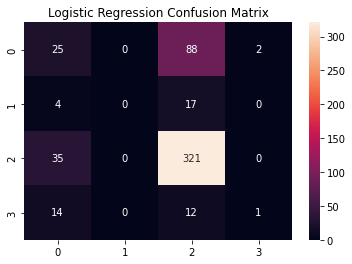

In [26]:
plt.title('Logistic Regression Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True,fmt='g')
plt.show()

In [27]:
print(f"Logistic Regression accuracy is : {round(accuracy_score(y_test,y_pred1)*100,2)} %")

Logistic Regression accuracy is : 66.86 %


In [28]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.32      0.22      0.26       115
           1       0.00      0.00      0.00        21
           2       0.73      0.90      0.81       356
           3       0.33      0.04      0.07        27

    accuracy                           0.67       519
   macro avg       0.35      0.29      0.28       519
weighted avg       0.59      0.67      0.62       519



#Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
y_pred2 = rf.predict(x_test)

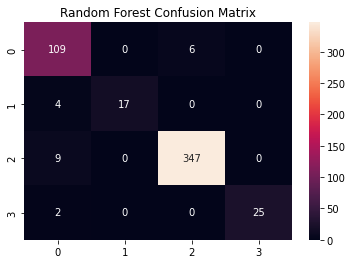

In [30]:
plt.title('Random Forest Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True,fmt='g')
plt.show()

In [31]:
print(f"Random Forest accuracy is : {round(accuracy_score(y_test,y_pred2)*100,2)} %")

Random Forest accuracy is : 95.95 %


In [ ]:
print(classification_report(y_test,y_pred2))

#Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred3 = dt.predict(x_test)

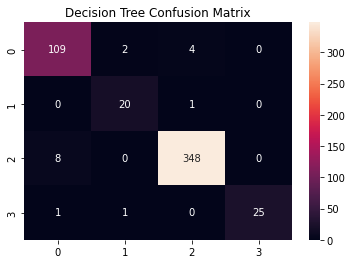

In [34]:
plt.title('Decision Tree Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,y_pred3),annot=True,fmt='g')
plt.show()

In [35]:
print(f"Decision Tree accuracy is : {round(accuracy_score(y_test,y_pred3)*100,2)} %")

Decision Tree accuracy is : 96.72 %


In [36]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       115
           1       0.87      0.95      0.91        21
           2       0.99      0.98      0.98       356
           3       1.00      0.93      0.96        27

    accuracy                           0.97       519
   macro avg       0.94      0.95      0.95       519
weighted avg       0.97      0.97      0.97       519



#Naive Bayes

In [37]:
from sklearn.naive_bayes import *
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred4 = nb.predict(x_test)

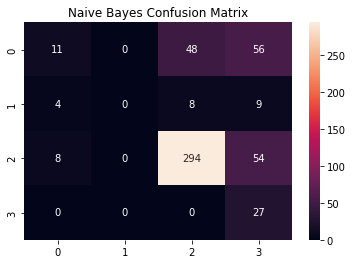

In [38]:
plt.title('Naive Bayes Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,y_pred4),annot=True,fmt='g')
plt.show()

In [39]:
print(f"Naive Bayes accuracy is : {round(accuracy_score(y_test,y_pred4)*100,2)} %")

Naive Bayes accuracy is : 63.97 %


In [40]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.48      0.10      0.16       115
           1       0.00      0.00      0.00        21
           2       0.84      0.83      0.83       356
           3       0.18      1.00      0.31        27

    accuracy                           0.64       519
   macro avg       0.38      0.48      0.33       519
weighted avg       0.69      0.64      0.62       519



#KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn=  KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
y_pred5=knn.predict(x_test)

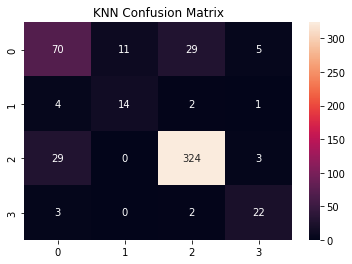

In [42]:
plt.title('KNN Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,y_pred5),annot=True,fmt='g')
plt.show()

In [44]:
print(f"KNN accuracy is : {round(accuracy_score(y_test,y_pred5)*100,2)} %")


KNN accuracy is : 82.85 %


In [45]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.66      0.61      0.63       115
           1       0.56      0.67      0.61        21
           2       0.91      0.91      0.91       356
           3       0.71      0.81      0.76        27

    accuracy                           0.83       519
   macro avg       0.71      0.75      0.73       519
weighted avg       0.83      0.83      0.83       519



In [46]:
Accuracy = [round(accuracy_score(y_test,y_pred1)*100,2),round(accuracy_score(y_test,y_pred2)*100,2),
           round(accuracy_score(y_test,y_pred3)*100,2),round(accuracy_score(y_test,y_pred4)*100,2),
           round(accuracy_score(y_test,y_pred5)*100,2)]

Accuracy

[66.86, 95.95, 96.72, 63.97, 82.85]

In [47]:
l = ['Logistic Regression','Random Forest','Decision Trees','Naive Bayes','KNN']

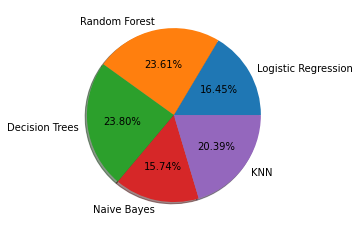

In [48]:
plt.pie(Accuracy,labels=l,shadow=True,autopct='%1.2f%%')
plt.show()

Pohon Keputusan dan Hutan Acak adalah algoritma dengan akurasi tertinggi diikuti oleh KNN

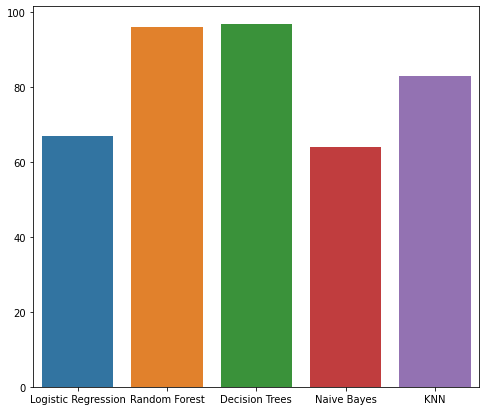

In [49]:
plt.figure(figsize=(8,7))
sns.barplot(x = l,y=Accuracy)

Pohon keputusan memberikan akurasi tertinggi 97%